In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore

data = pd.read_csv('filtered_data.csv')

# Identify your feature matrix X and target vector y
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify columns for standardization and one-hot encoding
columns_to_standardize = ['Rooms', 'Number of Bathrooms', 'Size (sqft)', 'Walk Score', 'Transit Score', 'Bike Score', 
                          'Time to Nearest Hospital', 'Time to Nearest Police Station', 'Time to Nearest Store', 
                          'Time to Nearest Pharmacy']
columns_to_encode = ['Property Type']

# Define the preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_standardize),
        ('cat', OneHotEncoder(), columns_to_encode)
    ])

# Create a pipeline that combines the preprocessor with a model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Evaluate the pipeline using cross-validation
scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Average MSE: {-scores.mean()}")

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = model_pipeline.predict(X_test)

Average MSE: 193541.5386912996


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2}")

# Calculate Adjusted R-squared
# Adjusted R2 = 1 - (1-R2)*(n-1)/(n-p-1)
# n is the number of samples, p is the number of predictors
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print(f"Adjusted R-squared: {adjusted_r2}")

# Calculate MAPE - Note: Need to handle cases where y_test is 0 to avoid division by zero
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 152.7890186017686
Mean Squared Error (MSE): 48336.01885871195
Root Mean Squared Error (RMSE): 219.8545402276513
R-squared (R2): 0.7952931972442445
Adjusted R-squared: 0.6997633559582253
Mean Absolute Percentage Error (MAPE): 7.1089265469526%


In [3]:
model = model_pipeline.steps[-1][1]  # Access the second element (model) of the last step
print(model.get_params())  # Display all parameters

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


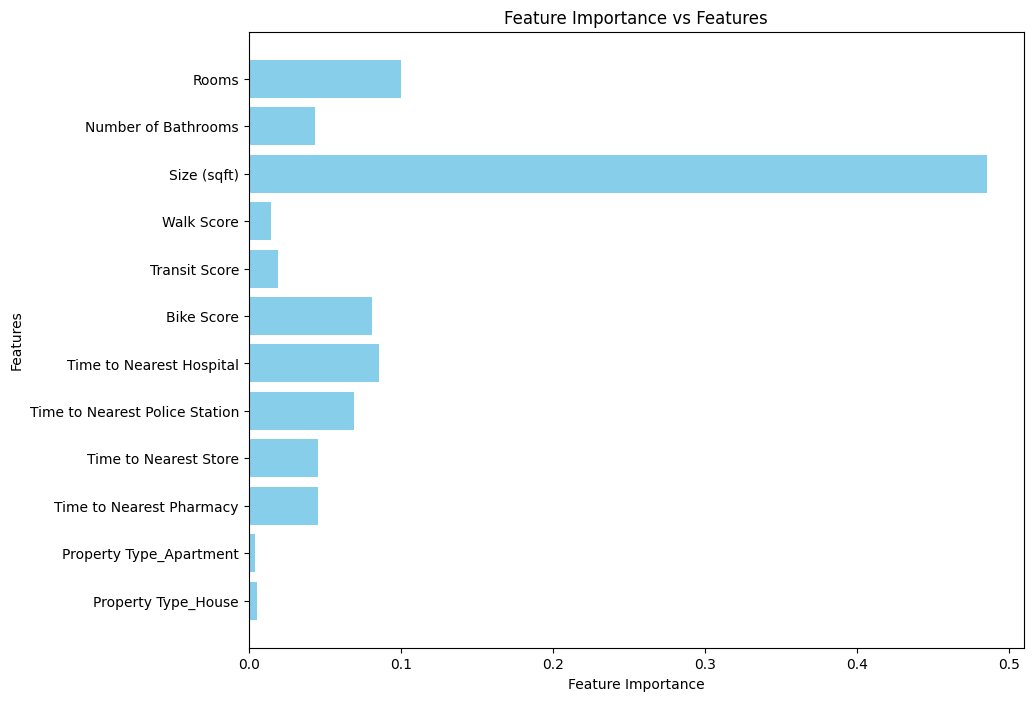

In [4]:
import matplotlib.pyplot as plt

# Retrieve feature names from the preprocessor
# For one-hot encoded features, this will expand the feature names
# Numeric features remain unchanged
feature_names_transformed = model_pipeline.named_steps['preprocessor'].transformers_[0][2] + \
    list(model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Feature importances extracted from the model
feature_importances = model_pipeline.named_steps['regressor'].feature_importances_

# Ensure the length of feature names matches the length of their importances
assert len(feature_names_transformed) == len(feature_importances), "The lengths of feature names and importances do not match."

# Create a bar graph for feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importances)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_importances)), feature_names_transformed)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance vs Features')
plt.gca().invert_yaxis()  # Display the highest importance at the top
plt.show()


In [11]:
print(data.columns[1:])
print(data1)
data['Feature Importances'] = feature_importances

Index(['Property Type', 'Rooms', 'Den Included', 'Number of Bathrooms',
       'Latitude', 'Longitude', 'Size (sqft)', 'Walk Score', 'Transit Score',
       'Bike Score', 'Time to Nearest Hospital',
       'Time to Nearest Police Station', 'Time to Nearest Store',
       'Time to Nearest Pharmacy'],
      dtype='object')
[<bound method StringMethods.extract of <pandas.core.strings.accessor.StringMethods object at 0x15e1fc170>>]


ValueError: Length of values (12) does not match length of index (223)